### Simple Linear Regression (Big maac price) 

Date: 10-Dec-23

- Learning from: Prasert Kanawattanachai (CBS)
- Youtube: https://www.youtube.com/prasertcbs
- Github: https://github.com/prasertcbs/
- Facebook Prophet: https://github.com/facebook/prophet

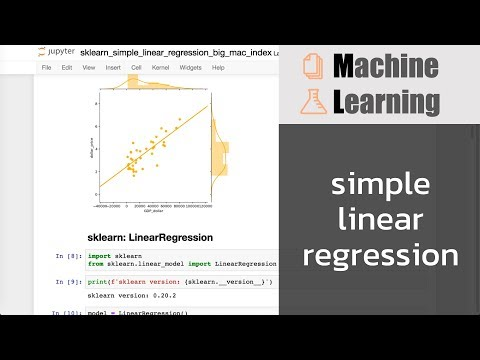

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('1Rkt8Zk3KBM', width = 720, height = 405)

In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# load csv dat to a dataframe

url = 'https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv'
df = pd.read_csv(url, parse_dates = ['date'])
df.head(4)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,7803.328512,1.928167,0.39739,0.16547,-0.06363,0.10547,0.96883
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,29165.768649,2.317131,-0.28293,-0.40194,-0.51950,-0.43273,0.01031
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,4822.738983,1.873897,-0.05214,-0.20945,-0.36485,-0.25015,0.33548
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,20976.720505,2.168026,0.49234,0.24466,0.00000,0.18059,1.10262


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1489 non-null   datetime64[ns]
 1   iso_a3         1489 non-null   object        
 2   currency_code  1489 non-null   object        
 3   name           1489 non-null   object        
 4   local_price    1489 non-null   float64       
 5   dollar_ex      1489 non-null   float64       
 6   dollar_price   1489 non-null   float64       
 7   GDP_bigmac     1489 non-null   float64       
 8   adj_price      1489 non-null   float64       
 9   USD            1489 non-null   float64       
 10  EUR            1489 non-null   float64       
 11  GBP            1489 non-null   float64       
 12  JPY            1489 non-null   float64       
 13  CNY            1489 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 163.0+ KB


In [5]:
df[df['date'].dt.year == 2019]

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1022,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.400040,-0.43135,-0.50271,-0.40109,-0.29847,-0.37607
1023,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58148.657774,4.420911,-0.04949,-0.16876,0.00110,0.17263,0.04292
1024,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.534656,3.087021,0.42174,0.24334,0.49740,0.75398,0.55995
1025,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,47946.778270,4.141975,-0.05053,-0.16967,0.00000,0.17135,0.04178
1026,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.980317,0.23350,0.07872,0.29914,0.52175,0.35341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2019-07-09,CHE,CHF,Switzerland,6.50,0.993550,6.542197,60616.981182,4.458840,0.40629,0.25773,0.46590,0.74631,0.57891
1092,2019-07-09,TWN,TWD,Taiwan,72.00,31.172000,2.309765,50957.486729,4.211819,-0.47438,-0.52991,-0.45210,-0.34729,-0.40986
1093,2019-07-09,THA,THB,Thailand,119.00,30.827500,3.860190,9334.129259,3.147391,0.17553,0.05134,0.22535,0.45975,0.31981
1094,2019-07-09,TUR,TRY,Turkey,13.99,5.722000,2.444949,15431.720106,3.303324,-0.29060,-0.36554,-0.26053,-0.11908,-0.20352


In [6]:
df[df['date'].dt.month == 1]

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
189,2006-01-01,ARG,ARS,Argentina,4.75,3.063800,1.550362,8484.828303,2.318149,-0.22066,-0.49047,-0.42260,-0.04530,0.13528
190,2006-01-01,AUS,AUD,Australia,3.25,1.330800,2.442140,38969.391849,2.998310,-0.05087,-0.37945,-0.29680,0.16270,0.38263
191,2006-01-01,BRA,BRL,Brazil,6.20,2.261500,2.741543,5052.956482,2.241579,0.42519,-0.06820,0.05591,0.74588,1.07612
192,2006-01-01,GBR,GBP,Britain,1.88,0.566926,3.316132,32903.362963,2.862967,0.34973,-0.11754,0.00000,0.65344,0.96619
193,2006-01-01,CAN,CAD,Canada,3.52,1.170400,3.007519,33483.577219,2.875912,0.21861,-0.20326,-0.09715,0.49281,0.77518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,2023-01-01,UKR,UAH,Ukraine,92.00,36.917000,2.492077,8194.073258,3.907742,-0.41801,-0.46191,-0.38007,-0.06332,-0.26672
1432,2023-01-01,ARE,AED,United Arab Emirates,18.00,3.673000,4.900626,56107.327600,4.599351,-0.02762,-0.10097,0.03576,0.56499,0.22515
1433,2023-01-01,USA,USD,United States,5.36,1.000000,5.360000,76348.494000,4.891525,0.00000,-0.07543,0.06518,0.60945,0.25995
1434,2023-01-01,URY,UYU,Uruguay,268.00,39.125000,6.849840,16649.802040,4.029797,0.55123,0.43423,0.65235,1.49663,0.95448


In [7]:
# filter required data

df = df[(df['date'].dt.year == 2019) & (df['date'].dt.month == 1)]
df

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1022,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.400040,-0.43135,-0.50271,-0.40109,-0.29847,-0.37607
1023,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58148.657774,4.420911,-0.04949,-0.16876,0.00110,0.17263,0.04292
1024,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.534656,3.087021,0.42174,0.24334,0.49740,0.75398,0.55995
1025,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,47946.778270,4.141975,-0.05053,-0.16967,0.00000,0.17135,0.04178
1026,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.980317,0.23350,0.07872,0.29914,0.52175,0.35341
1027,2019-01-01,CHL,CLP,Chile,2640.00,678.990000,3.888128,18023.664044,3.323830,0.12948,-0.01225,0.18959,0.39342,0.23928
1028,2019-01-01,CHN,CNY,China,20.90,6.849700,3.051229,14684.528808,3.232533,-0.08860,-0.20297,-0.04010,0.12438,0.00000
1029,2019-01-01,COL,COP,Colombia,11900.00,3191.500000,3.728654,8101.496446,3.052543,0.17941,0.03142,0.24218,0.45502,0.29407
1030,2019-01-01,CZE,CZK,Czech Republic,85.00,22.311650,3.809669,28258.083030,3.603655,0.02075,-0.10733,0.07507,0.25929,0.11999
1031,2019-01-01,DNK,DKK,Denmark,30.00,6.515450,4.604440,61193.362480,4.504158,-0.01295,-0.13681,0.03958,0.21771,0.08301


In [8]:
len(df)

37

In [9]:
df.columns

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'GDP_bigmac', 'adj_price', 'USD', 'EUR', 'GBP', 'JPY',
       'CNY'],
      dtype='object')

<Figure size 1600x900 with 0 Axes>

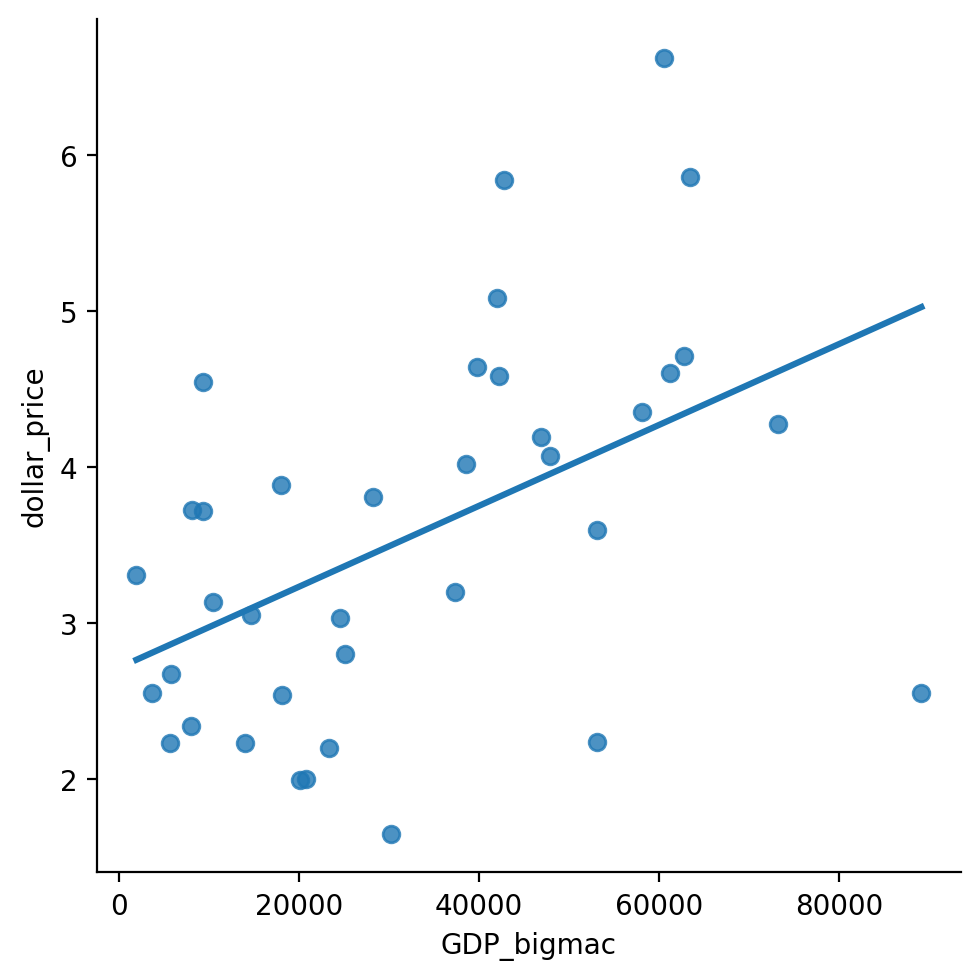

In [11]:
# plot 

plt.figure(figsize = (16, 9))
sns.lmplot(data = df, x = 'GDP_bigmac', y = 'dollar_price', ci = None)

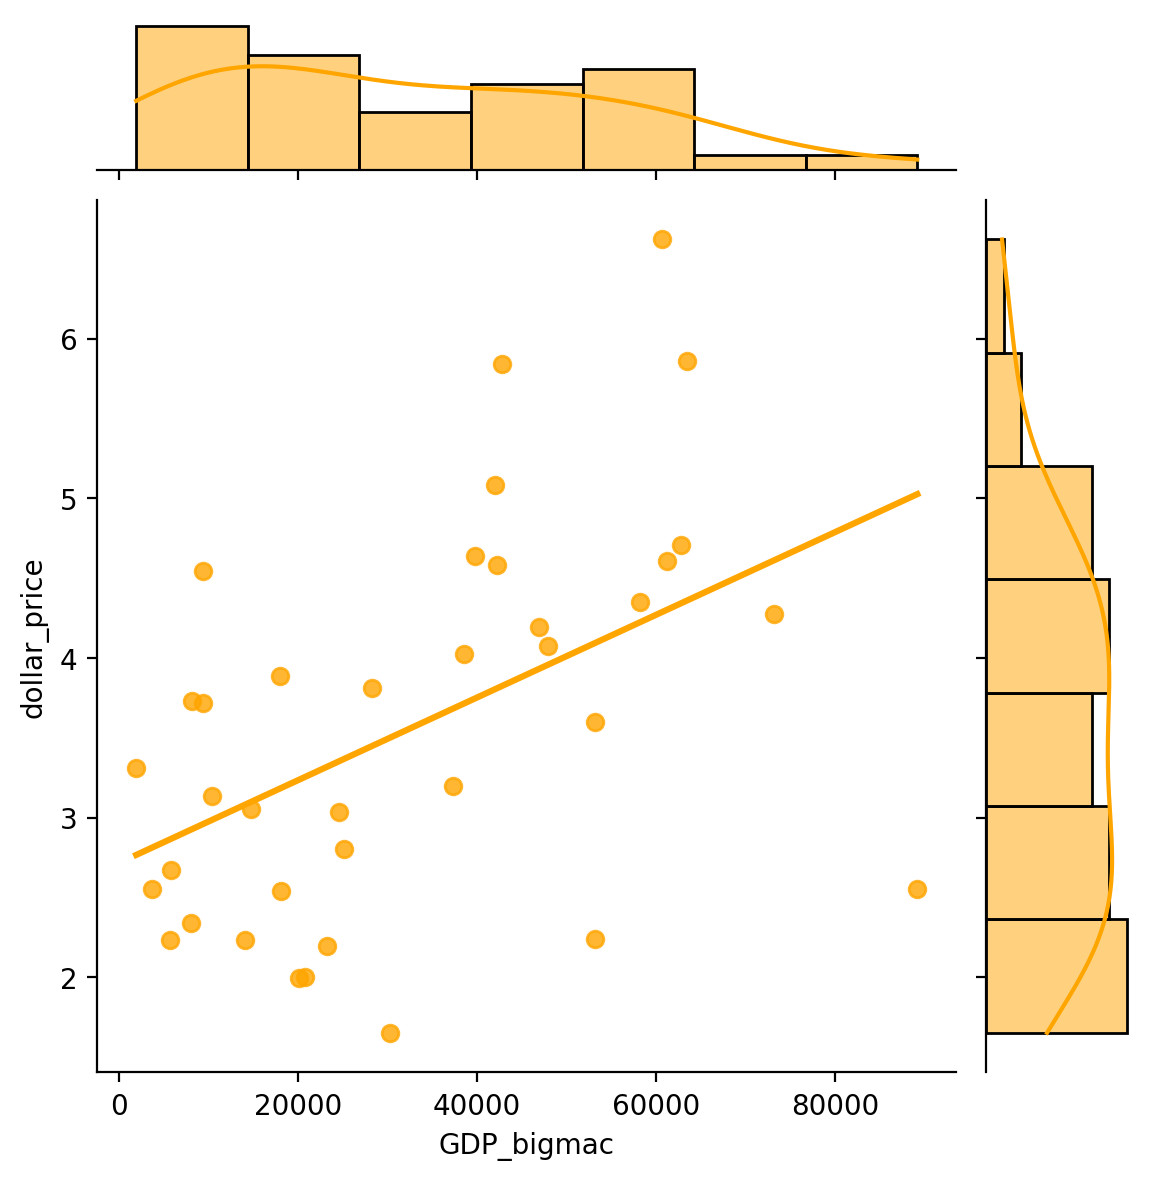

In [12]:
sns.jointplot(data = df, x = 'GDP_bigmac', y = 'dollar_price', kind = 'reg', ci = None, color = 'orange')

### sklearn: LinearRegression

In [13]:
import sklearn
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression() # step 1: create object/instance from LinearRegression class
model

LinearRegression()

In [15]:
df['GDP_bigmac'].head(4) # series

1022    20810.978188
1023    58148.657774
1024     9362.534656
1025    47946.778270
Name: GDP_bigmac, dtype: float64

In [16]:
df[['GDP_bigmac']].head(4) # dataframe

,GDP_bigmac
1022,20810.978188
1023,58148.657774
1024,9362.534656
1025,47946.778270


In [17]:
type(df['GDP_bigmac']), type(df[['GDP_bigmac']])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [18]:
model.fit(df[['GDP_bigmac']], df['dollar_price']) # step 2: fit a model

LinearRegression()

In [19]:
model.score(df[['GDP_bigmac']], df['dollar_price']) # step 3: model scoring

0.23344682453670118